In [17]:
# 1. Import the libraries
import pandas as pd
import yfinance as yf
import numpy as np

In [55]:
# 2. Download the data

df_yahoo = yf.download('AAPL', start = '2010-01-01',
                end='2020-12-31',
                progress=False)

In [56]:
df_yahoo = df_yahoo.loc[:,  ['Adj Close']]
df_yahoo.rename(columns = {'Adj Close': 'adj_close'}, inplace = True)

In [57]:
df_yahoo.head()

,adj_close
Date,
2009-12-31,6.462008
2010-01-04,6.562591
2010-01-05,6.573935
2010-01-06,6.469369
2010-01-07,6.457407


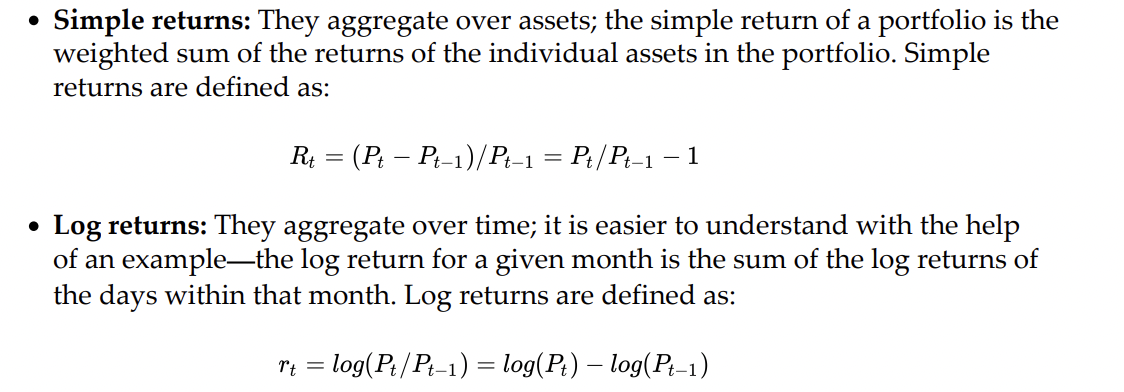

#### Calculate the returns


In [58]:
# Simple returns 

df_yahoo['simple_rtn'] = df_yahoo['adj_close'].pct_change()

In [47]:
# Log returns

In [59]:
df_yahoo['log_rtn'] = np.log(df_yahoo.adj_close/ df_yahoo.adj_close.shift(1))

In [60]:
df_yahoo.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2009-12-31,6.462008,NaN,NaN
2010-01-04,6.562591,0.015565,0.015445
2010-01-05,6.573935,0.001729,0.001727
2010-01-06,6.469369,-0.015906,-0.016034
2010-01-07,6.457407,-0.001849,-0.001851


In [23]:
import matplotlib.pyplot as plt

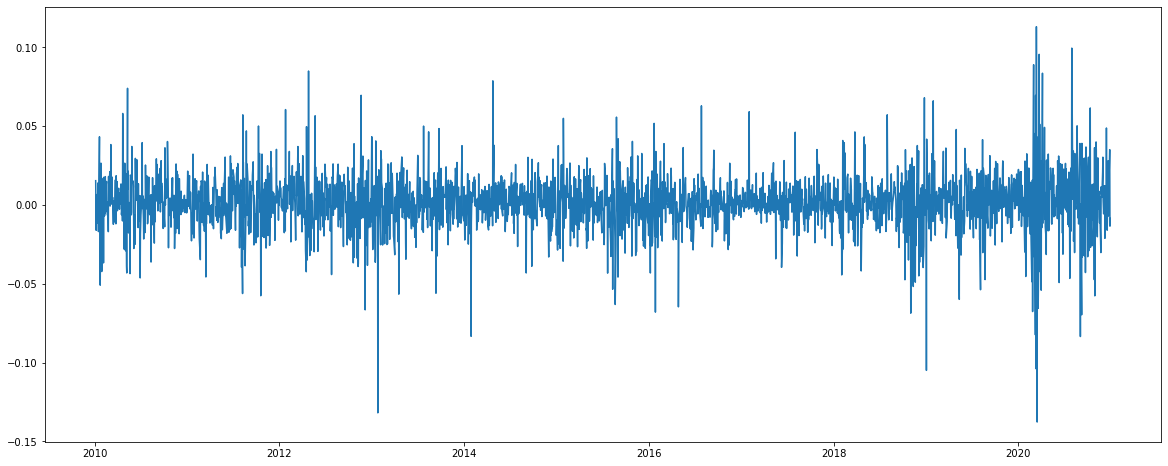

In [61]:
fig, axes = plt.subplots(figsize = (20, 8))
plt.plot(df_yahoo.index, df_yahoo['log_rtn'], label = "adj_close")
# plt.plot(df_yahoo.index, df_yahoo['simple_rtn'], label = "adj_close")

#### Realized volatilities

In [62]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [65]:
# Monthly realized volatility

df_rv = df_yahoo.groupby(pd.Grouper(freq = 'M')).apply(realized_volatility)
df_rv.rename(columns = {'log_rtn': 'rv'}, inplace= True)

In [66]:
df_rv.head()

,adj_close,simple_rtn,rv
Date,,,
2009-12-31,6.462008,0.000000,0.000000
2010-01-31,27.775308,0.101260,0.102038
2010-02-28,26.576313,0.062332,0.062503
2010-03-31,32.874732,0.062511,0.061829
2010-04-30,35.329298,0.087574,0.086378
...,...,...,...
2020-08-31,534.746059,0.099286,0.098050
2020-09-30,525.117123,0.155279,0.157891
2020-10-31,542.765489,0.127470,0.127678


In [67]:
# Annualize the values

df_rv.rv = df_rv.rv * np.sqrt(12)

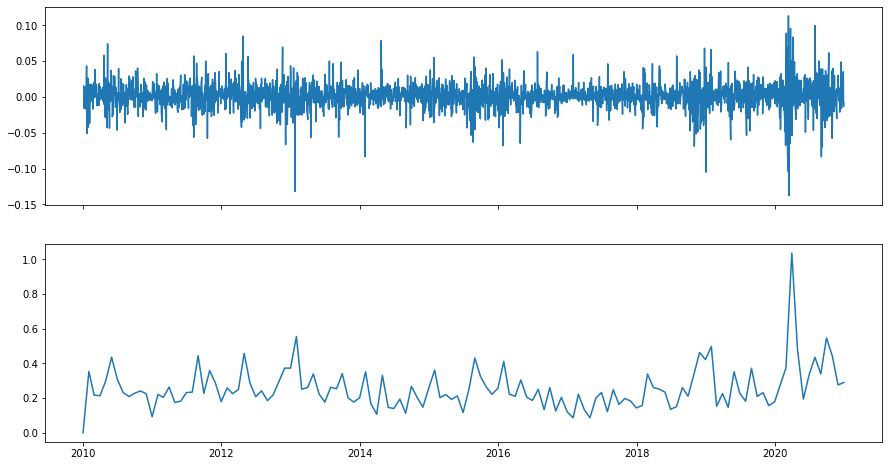

In [76]:
# Plot 

fig, ax = plt.subplots(2, 1, sharex=True, figsize = (15, 8))
ax[0].plot(df_yahoo.log_rtn)
ax[1].plot(df_rv.rv)
plt.show()